In [1]:
import pandas as pd

In [2]:
base = pd.read_excel(r'C:/users/carol/Downloads/BaseInadimplencia.xlsx')

In [3]:
X = base.drop('Situacao', axis = 1)
y = base.Situacao

In [4]:
from imblearn.over_sampling import RandomOverSampler

In [5]:
ros = RandomOverSampler(random_state=42,shrinkage=0.5)

In [6]:
X_ros,y_ros = ros.fit_resample(X,y)

In [7]:
y_ros.value_counts()

0    150
1    150
Name: Situacao, dtype: int64

In [8]:
base.loc[base.Situacao == 1]

,SaldoConta,SaldoInvestimento,Situacao
150,1.999168,2.333924,1
151,2.498148,2.749414,1
152,1.585570,4.027849,1
153,1.858754,0.939691,1
154,3.028616,3.047133,1
155,0.911150,1.109671,1
156,4.231165,-0.547074,1
157,2.987803,2.358257,1
158,4.375921,2.370152,1
159,2.518741,3.153611,1


In [9]:
base.iloc[150]

SaldoConta           1.999168
SaldoInvestimento    2.333924
Situacao             1.000000
Name: 150, dtype: float64

In [10]:
#venndo as linhas que ele duplicou
X_ros[X_ros.SaldoConta == base.iloc[150,0]]

,SaldoConta,SaldoInvestimento
150,1.999168,2.333924


In [11]:
for i in range(150,166):
    print(len(X_ros[X_ros.SaldoConta == base.iloc[150,0]]))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Shrinkage vai ser usado para suavizar um pouco os dados, para que o modelo não veja vários valores iguais e acabe gerando overfitting, ou seja, quando o modelo decora os resultados

In [12]:
base.sort_values('SaldoConta',ascending=False)

,SaldoConta,SaldoInvestimento,Situacao
158,4.375921,2.370152,1
156,4.231165,-0.547074,1
162,3.944314,5.150743,1
161,3.790351,3.371406,1
154,3.028616,3.047133,1
...,...,...,...
126,-4.652379,-1.440781,0
86,-4.690569,-1.542231,0
78,-5.163081,-2.090335,0
112,-5.317297,-3.186625,0


In [13]:
X_ros.sort_values('SaldoConta',ascending=False)

,SaldoConta,SaldoInvestimento
276,4.589547,2.808586
296,4.543829,2.054724
298,4.514919,1.730259
275,4.490342,3.395298
222,4.433378,-0.611434
...,...,...
126,-4.652379,-1.440781
86,-4.690569,-1.542231
78,-5.163081,-2.090335
112,-5.317297,-3.186625


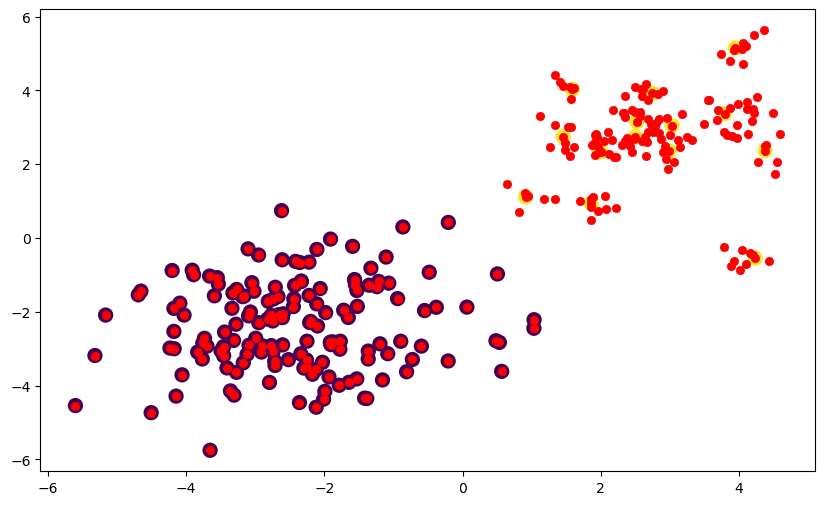

In [14]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(base.SaldoConta,base.SaldoInvestimento,c = base.Situacao, linewidth=5)
ax.scatter(X_ros.SaldoConta,X_ros.SaldoInvestimento, c ='red',linewidth=0.5)

plt.show()

SMOTE e ADASYN
Ao invés de duplicar os valores, serão geradas novas amostras utilizando KNN

In [15]:
#utilizando SMOTE
from imblearn.over_sampling import SMOTE

In [16]:
sm = SMOTE(random_state=42)

In [17]:
X_ros,y_ros = sm.fit_resample(X,y)

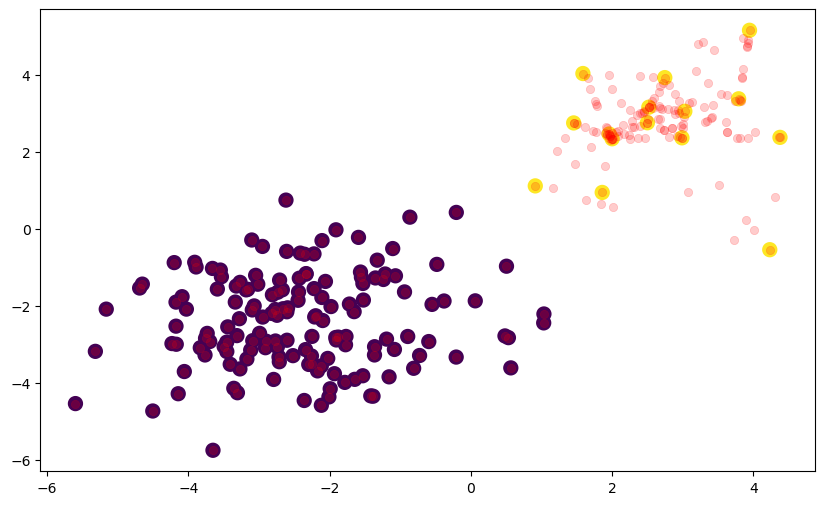

In [18]:
fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(base.SaldoConta,base.SaldoInvestimento,c = base.Situacao, linewidth=5)
ax.scatter(X_ros.SaldoConta,X_ros.SaldoInvestimento, c ='red',linewidth=0.5,alpha=0.2)

plt.show()

In [19]:
#utilizando o ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_ros,y_ros = ada.fit_resample(X,y)

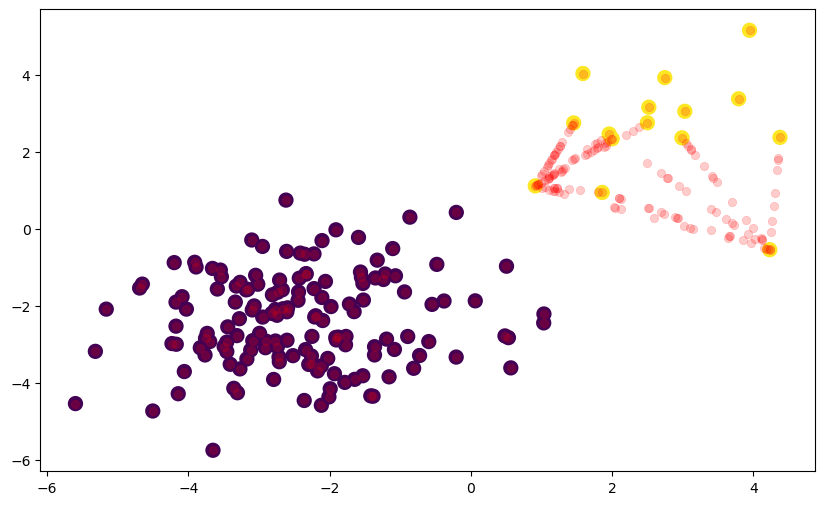

In [20]:
fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(base.SaldoConta,base.SaldoInvestimento,c = base.Situacao, linewidth=5)
ax.scatter(X_ros.SaldoConta,X_ros.SaldoInvestimento, c ='red',linewidth=0.5,alpha=0.2)

plt.show()